Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### Reading/Understanding the data


### Importing all the important libraries

In [36]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import pathlib
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [103]:
data_dir_train = pathlib.Path("gdrive/My Drive/colab_notebooks/melanoma_folder/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/colab_notebooks/melanoma_folder/Test')

In [44]:
## Directory path for train and test images
train_dir = 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train'
test_dir = 'gdrive/My Drive/colab_notebooks/melanoma_folder/Test'

In [45]:
train_jpg_files = glob.glob(train_dir + "/**/*.jpg", recursive=True)
print(len(train_jpg_files))
test_jpg_files = glob.glob(test_dir + "/**/*.jpg", recursive=True)
print(len(test_jpg_files))

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [46]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [47]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.20,
  label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [48]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.20,
  label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [49]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

gdrive/My Drive/colab_notebooks/melanoma_folder/Train/actinic keratosis/ISIC_0028393.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/basal cell carcinoma/ISIC_0026829.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/dermatofibroma/ISIC_0030427.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/ISIC_0001112.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/nevus/ISIC_0000093.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/pigmented benign keratosis/ISIC_0025515.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/seborrheic keratosis/ISIC_0011176.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/squamous cell carcinoma/ISIC_0025539.jpg
gdrive/My Drive/colab_notebooks/melanoma_folder/Train/vascular lesion/ISIC_0033991.jpg


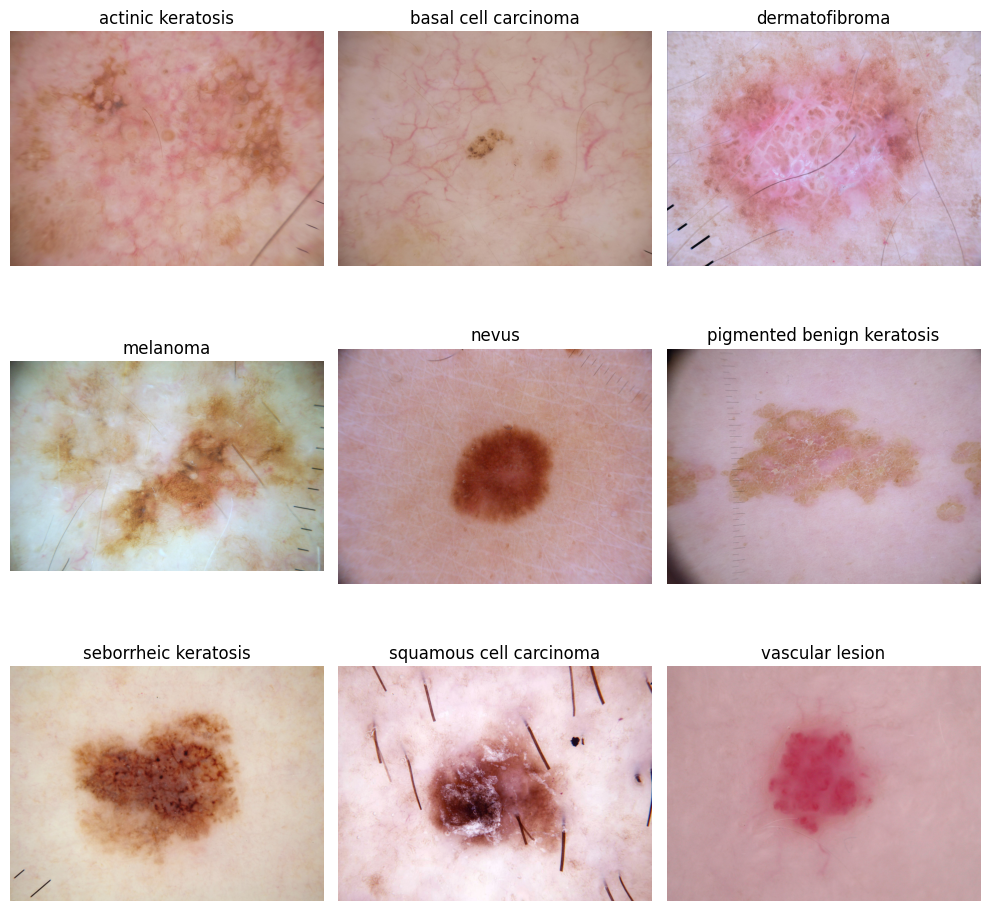

In [50]:
import matplotlib.pyplot as plt
from PIL import Image
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over each subdirectory
for i, subdir in enumerate(class_names):
    subdir_path = os.path.join(train_dir, subdir)
    image_files = [file for file in os.listdir(subdir_path) if file.endswith('.jpg')]
    if len(image_files) > 0:
        image_path = os.path.join(subdir_path, image_files[0])
        print(image_path)
        image = Image.open(image_path)
        # Display the image
        axs[i // 3, i % 3].imshow(image)
        axs[i // 3, i % 3].set_title(subdir)
        axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [52]:
### Your code goes here



input_shape = (180,180,3)
num_classes = 9  # Replace with the actual number of classes

# Define the simple model
model = keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))

model.add(layers.Dense(num_classes, activation="softmax"))





### Compile the model
Choose an appropirate optimiser and loss function for model training

In [53]:
### Todo, choose an appropirate optimiser and loss function
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)      

### Train the model

In [55]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 203s 762ms/step - loss: 2.0396 - accuracy: 0.2126 - val_loss: 1.9958 - val_accuracy: 0.2416
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.9334 - accuracy: 0.2879 - val_loss: 1.8912 - val_accuracy: 0.2975
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.8398 - accuracy: 0.3270 - val_loss: 1.7814 - val_accuracy: 0.3624
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6955 - accuracy: 0.3850 - val_loss: 1.6053 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 2s 38ms/step - loss: 1.5980 - accuracy: 0.4392 - val_loss: 1.5616 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.5303 - accuracy: 0.4738 - val_loss: 1.5003 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 2s 38ms/step - loss: 1.4630 - accuracy: 0.4933 - val_loss: 1.4457 - val_accuracy: 0.5190
Epoch 8/20

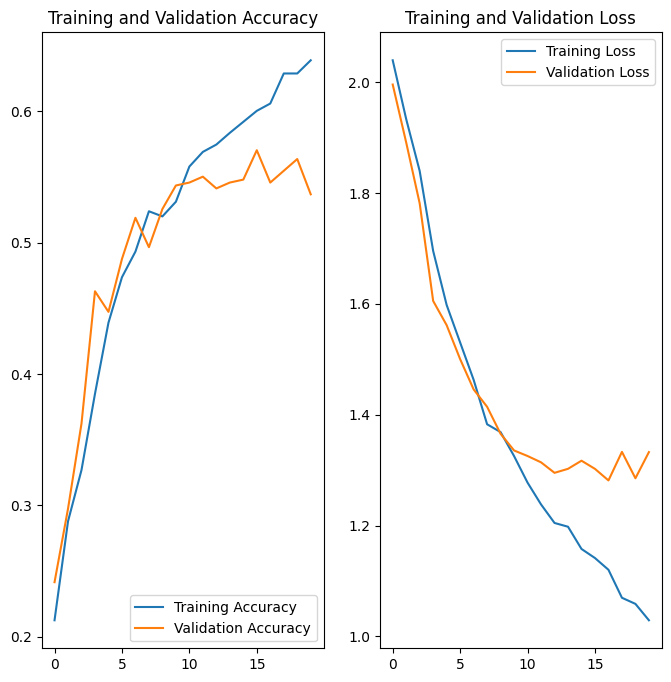

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [61]:
train_loss, train_accuracy = model.evaluate(train_ds, verbose=1)
valid_loss, valid_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", train_accuracy)
print("Validation Accuracy: ",valid_accuracy)
print("Loss: ",train_loss)
print("Validation Loss", valid_loss)


14/14 [==============================] - 0s 14ms/step - loss: 1.3325 - accuracy: 0.5369
Accuracy:  0.6467633843421936
Validation Accuracy:  0.536912739276886
Loss:  1.017168641090393
Validation Loss 1.3325252532958984


Vlaidation loss is more than train loss and validation accuracy is less than train accuracy.This is a classic sign of overfitting .hence we can introduce regularization in our network using dropout layers and batch normalization.

In [62]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Randomly shift width by 20% of the image size
    height_shift_range=0.2,  # Randomly shift height by 20% of the image size
    horizontal_flip=True ,
    vertical_flip = True,# Randomly flip images horizontally
    validation_split=0.2,
)

valid_datagen = ImageDataGenerator(rescale=1./255)

all_images = [os.path.join(train_dir, class_dir, img) for class_dir in os.listdir(train_dir) for img in os.listdir(os.path.join(train_dir, class_dir))]
train_images, valid_images = train_test_split(all_images, test_size=0.2, random_state=42)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(filepath)) for filepath in train_images]}),
    directory=None,
    x_col= 'filename',
    y_col = 'class',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode="categorical",
    classes = class_names,
    shuffle=True)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': valid_images, 'class': [os.path.basename(os.path.dirname(filepath)) for filepath in valid_images]}),
    directory= None,
    x_col= 'filename',
    y_col = 'class',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode='categorical',
    classes = class_names,
    shuffle=False)

Found 1791 validated image filenames belonging to 9 classes.
Found 448 validated image filenames belonging to 9 classes.


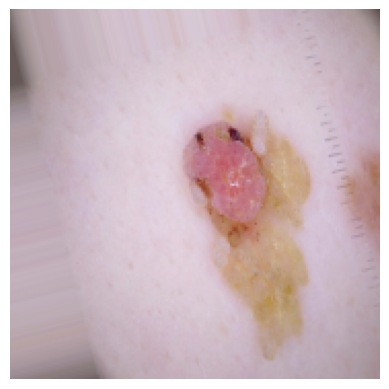

In [68]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

images, labels = next(train_generator)

# Select a specific image from the batch (e.g., the first image)
image = images[0]



# Convert the image from NumPy array to PIL Image format (if needed)
# image = Image.fromarray(image.astype('uint8'))  # Uncomment this line if you need to convert to PIL Image

# Display the image

plt.imshow(image)
plt.axis('off')
plt.show()




In [69]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Todo:
### Create the model, compile and train the model


In [85]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
input_shape = (180, 180, 3)
model = keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout layer for regularization

model.add(layers.Dense(9, activation="softmax"))


### Compiling the model

In [86]:
## Your code goes here
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=1e-7)

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model

In [87]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 67s 1s/step - loss: 2.6724 - accuracy: 0.2686 - val_loss: 3.0437 - val_accuracy: 0.2031
Epoch 2/20
56/56 [==============================] - 65s 1s/step - loss: 2.2571 - accuracy: 0.3467 - val_loss: 4.4851 - val_accuracy: 0.2031
Epoch 3/20
56/56 [==============================] - 64s 1s/step - loss: 2.1667 - accuracy: 0.3439 - val_loss: 6.2852 - val_accuracy: 0.2031
Epoch 4/20
56/56 [==============================] - 64s 1s/step - loss: 1.9905 - accuracy: 0.3685 - val_loss: 9.9860 - val_accuracy: 0.2031
Epoch 5/20
56/56 [==============================] - 64s 1s/step - loss: 1.9678 - accuracy: 0.3881 - val_loss: 12.0580 - val_accuracy: 0.2031
Epoch 6/20
56/56 [==============================] - 74s 1s/step - loss: 1.8883 - accuracy: 0.4015 - val_loss: 13.6895 - val_accuracy: 0.2031
Epoch 7/20
56/56 [==============================] - 63s 1s/step - loss: 1.8098 - accuracy: 0.4087 - val_loss: 14.3972 - val_accuracy: 0.2031
Epoch 8/20
56/56 

### Visualizing the results

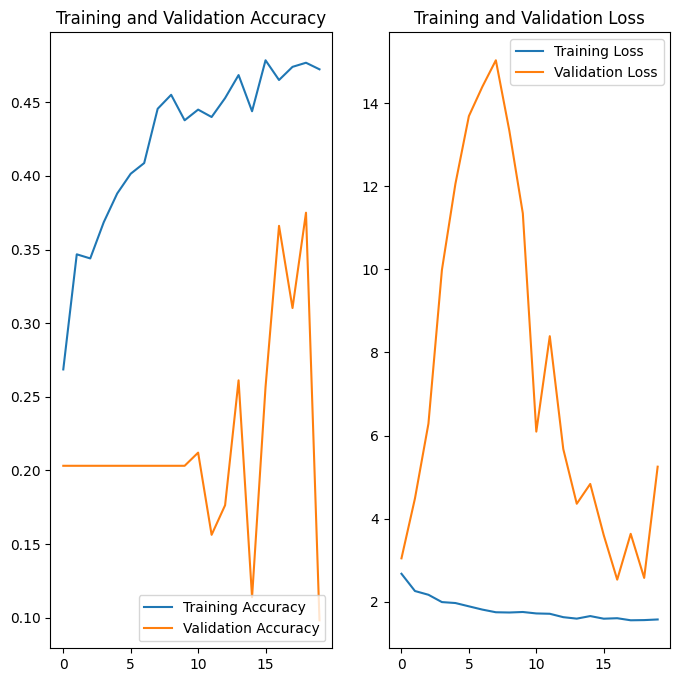

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


In this case atleast,regularization doesn't seem to help as much,with validation accuracy becoming even worse and also loss seems to be increasing.This might be mainly because the dataset itself is not large enough for training optimally.Hence ,the best way from here on would be to create synthetic samples for each class.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [89]:
## Your code goes here.
def class_count(dir,class_name):
  return len(os.listdir(os.path.join(dir, class_name)))
train_dic ={}
test_dic = {}
full_dic = {}
for class_name in class_names:
  train_dic[class_name] = class_count(train_dir,class_name)
  test_dic[class_name] = class_count(test_dir,class_name)
  full_dic[class_name] = train_dic[class_name]+test_dic[class_name]




In [90]:
train_dic

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

In [91]:
test_dic

{'actinic keratosis': 16,
 'basal cell carcinoma': 16,
 'dermatofibroma': 16,
 'melanoma': 16,
 'nevus': 16,
 'pigmented benign keratosis': 16,
 'seborrheic keratosis': 3,
 'squamous cell carcinoma': 16,
 'vascular lesion': 3}

In [92]:
full_dic

{'actinic keratosis': 130,
 'basal cell carcinoma': 392,
 'dermatofibroma': 111,
 'melanoma': 454,
 'nevus': 373,
 'pigmented benign keratosis': 478,
 'seborrheic keratosis': 80,
 'squamous cell carcinoma': 197,
 'vascular lesion': 142}

In [93]:
def visualize_distribution(dic,mode):
  keys = list(dic.keys())
  values = list(dic.values())

  # Generate colors using a colormap
  num_bars = len(keys)
  colors = plt.cm.get_cmap('tab20')(np.arange(num_bars))

  # Create the bar plot
  plt.bar(keys, values, color=colors)

  # Add labels and title
  plt.xlabel('Class')
  plt.ylabel('Number of Images')
  plt.title('Number of Images per Class in {}'.format(mode))

  # Rotate x-axis labels if needed
  plt.xticks(rotation=45, ha='right')

  # Display the plot
  plt.tight_layout()
  plt.show()
  return


<ipython-input-93-153321f21798>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20')(np.arange(num_bars))


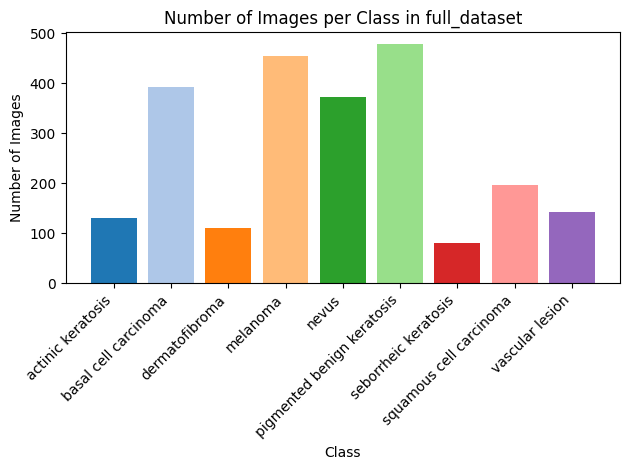

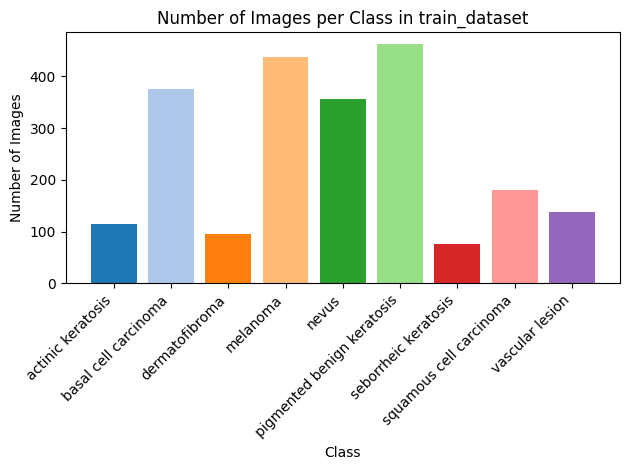

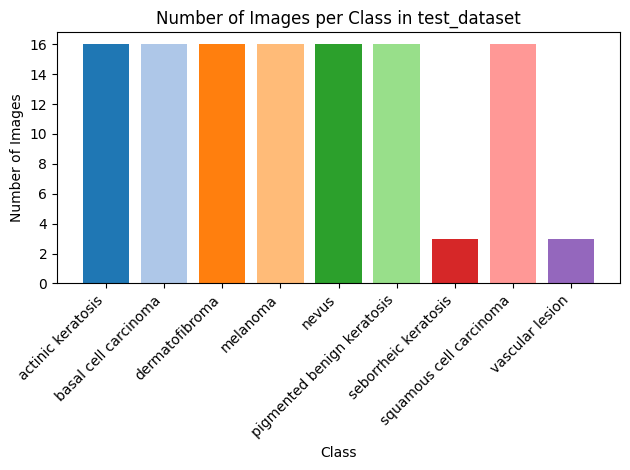

In [94]:
visualize_distribution(full_dic,'full_dataset')
visualize_distribution(train_dic,'train_dataset')
visualize_distribution(test_dic,'test_dataset')


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
 Ans. - seborrheic keratosis has the least number of images with only 80 images(77 in train,3 in test)
#### - Which classes dominate the data in terms proportionate number of samples?

Ans - pigmented benign keratosis has the highest number of images - around 478(462 train,16 test).
Also melanoma dominates has 438 images in train and 16 in test set(454 in total)
Nevus alos has 373 images in total(357 train,16 test).

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [95]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [96]:
path_to_training_dataset='gdrive/My Drive/colab_notebooks/melanoma_folder/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE36A479D20>: 100%|██████████| 500/500 [00:23<00:00, 21.58 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE36F1FA740>: 100%|██████████| 500/500 [00:24<00:00, 20.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE414789300>: 100%|██████████| 500/500 [00:25<00:00, 19.87 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FE36A3586A0>: 100%|██████████| 500/500 [02:08<00:00,  3.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FE36A35BC10>: 100%|██████████| 500/500 [01:51<00:00,  4.49 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE414915B10>: 100%|██████████| 500/500 [00:25<00:00, 19.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE36A2F1210>: 100%|██████████| 500/500 [00:55<00:00,  9.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE36F1F89A0>: 100%|██████████| 500/500 [00:24<00:00, 20.23 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/colab_notebooks/melanoma_folder/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE353ED6D40>: 100%|██████████| 500/500 [00:23<00:00, 21.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [104]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [105]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0010271.jpg_b244ac30-5dc1-4e72-b635-2b3dfeaff5e8.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0010385.jpg_7248495a-2eda-43d8-8dce-fcba8779978a.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0010770.jpg_7c909e11-824f-4e26-8ae1-030d768550f9.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0000166.jpg_70cbd865-1b9f-4988-b59f-99445209ad0e.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0000280.jpg_5da79b73-7dc4-42eb-816e-a7642960d75b.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_0009910.jpg_2044b8b9-12f5-474f-994d-024c101647a6.jpg',
 'gdrive/My Drive/colab_notebooks/melanoma_folder/Train/melanoma/output/melanoma_original_ISIC_00111

In [106]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [108]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [109]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [110]:
new_df['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
nevus                         500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [111]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [112]:
train_dir ="gdrive/My Drive/colab_notebooks/melanoma_folder/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [113]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [114]:
for images, labels in train_ds:
  print(labels)
  break

tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(32, 9), dtype=float3

#### **Todo:** Create your model (make sure to include normalization)

In [115]:
## your code goes here
input_shape = (180, 180, 3)
model = keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer for regularization

model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout layer for regularization

model.add(layers.Dense(9, activation="softmax"))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [116]:
## your code goes here
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 87, 87, 64)       

#### **Todo:**  Train your model

In [117]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 45s 252ms/step - loss: 2.0712 - accuracy: 0.3420 - val_loss: 8.0673 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 44s 251ms/step - loss: 1.6024 - accuracy: 0.4555 - val_loss: 6.9516 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 43s 248ms/step - loss: 1.4179 - accuracy: 0.5087 - val_loss: 6.0669 - val_accuracy: 0.1774
Epoch 4/30
169/169 [==============================] - 43s 246ms/step - loss: 1.2435 - accuracy: 0.5677 - val_loss: 4.0012 - val_accuracy: 0.2702
Epoch 5/30
169/169 [==============================] - 46s 268ms/step - loss: 1.1222 - accuracy: 0.6089 - val_loss: 3.9648 - val_accuracy: 0.3497
Epoch 6/30
169/169 [==============================] - 43s 248ms/step - loss: 1.0105 - accuracy: 0.6519 - val_loss: 3.1457 - val_accuracy: 0.4944
Epoch 7/30
169/169 [==============================] - 43s 246ms/step - loss: 0.9082 - accuracy: 0.6866 - val_loss: 3.8170 - val_ac

#### **Todo:**  Visualize the model results

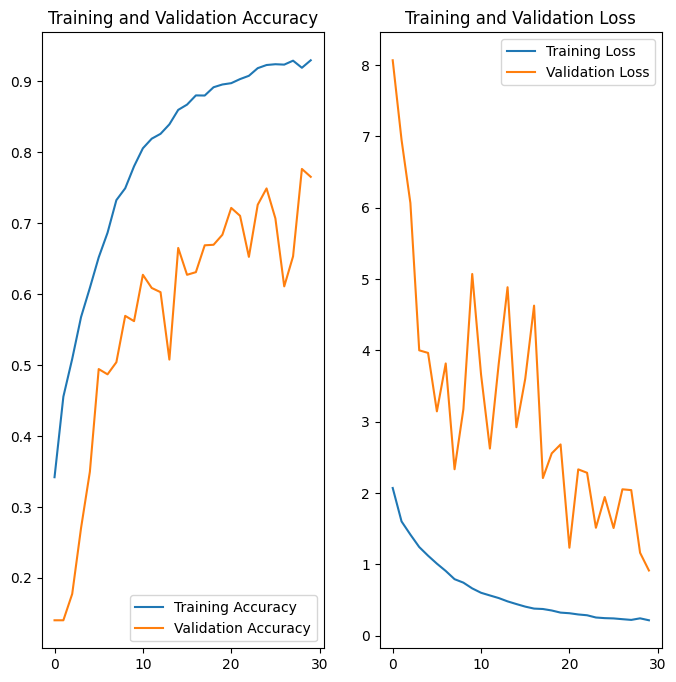

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Ans - Yes, class rebalance really helped in getting rid of overfitting.The validation accuracy improved all the way from nearly 0.35 to 0.78 at epoch 29 and the validation loss also decreased.
Obviously,more methods like gradient clliping can be tried since,evn now,there is a bit of difference between train accuracy and validation accuracy.